In [1151]:
import pandas as pd

# 讀取檔案
all_df = pd.read_csv("high_diamond_ranked_10min.csv")

# 刪除不必要的欄位
all_df = all_df.drop(
    [
        "gameId",
        "blueEliteMonsters",
        "blueGoldDiff",
        "blueExperienceDiff",
        "blueCSPerMin",
        "blueGoldPerMin",
        "redEliteMonsters",
        "redGoldDiff",
        "redFirstBlood",
        "redExperienceDiff",
        "redCSPerMin",
        "redGoldPerMin",
        "blueCSPerMin",
        "blueGoldPerMin",
    ],
    axis=1,
)
all_df

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,9,8,0,0,0,16567,6.8,17047,197,55
1,0,12,1,0,5,5,5,0,0,0,...,5,2,1,1,1,17620,6.8,17438,240,52
2,0,15,0,0,7,11,4,1,0,0,...,7,14,0,0,0,17285,6.8,17254,203,28
3,0,43,1,0,4,5,5,0,1,0,...,4,10,0,0,0,16478,7.0,17961,235,47
4,0,75,4,0,6,6,6,0,0,0,...,6,7,1,0,0,17404,7.0,18313,225,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,0,0,...,7,7,0,0,0,15246,6.8,16498,229,34
9875,1,54,0,0,6,4,8,1,0,0,...,6,3,0,0,0,15456,7.0,18367,206,56
9876,0,23,1,0,6,7,5,0,0,0,...,6,11,1,0,0,18319,7.4,19909,261,60
9877,0,14,4,1,2,3,3,1,0,0,...,2,1,0,0,0,15298,7.2,18314,247,40


In [1152]:
import numpy as np

mask = np.random.rand(len(all_df)) < 0.8
train_df = all_df[mask]
test_df = all_df[~mask]
len(test_df)

1971

In [1164]:
from typing import Tuple
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))


def feature_preprocessing(df: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
    # 把資料分開成特徵與標籤
    nd_array = df.values
    labels = nd_array[:, 0]  # 標籤
    data = nd_array[:, 1:]  # 特徵

    # 特徵縮放成0~1之間
    scaled_data = scaler.fit_transform(data)

    # OHE: one-hot encoding
    labels = to_categorical(labels)

    return scaled_data, labels


train_data, train_labels = feature_preprocessing(train_df)
test_data, test_labels = feature_preprocessing(test_df)
#test_labels
train_data
#train_labels

array([[0.09387755, 0.07407407, 1.        , ..., 0.55210567, 0.49450549,
        0.57954545],
       [0.02857143, 0.03703704, 0.        , ..., 0.58564199, 0.73076923,
        0.54545455],
       [0.04081633, 0.        , 0.        , ..., 0.56986019, 0.52747253,
        0.27272727],
       ...,
       [0.04897959, 0.07407407, 1.        , ..., 0.50501758, 0.67032967,
        0.34090909],
       [0.2       , 0.        , 0.        , ..., 0.66532293, 0.54395604,
        0.59090909],
       [0.07346939, 0.03703704, 0.        , ..., 0.79758127, 0.84615385,
        0.63636364]])

In [897]:
"""
Model1
acc維持0.72
loss維持0.55
"""
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(3, input_dim=27, activation="softmax"))
model.add(Dense(32, activation="softmax"))
model.add(Dense(2, activation="sigmoid"))

# 使用 Adam 優化器
optimizer = Adam(lr=0.01)

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["acc"])

In [481]:
"""
Model2
acc維持0.72
loss快速從0.45掉到0.18
"""
from keras.models import Sequential
from keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from keras import regularizers

model = Sequential()

model.add(Input(shape=(27,)))
model.add(Dense(16, activation="relu"))
model.add(Dense(16, activation="relu", kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(2, activation="relu"))

model.compile(optimizer="Adam", metrics=["acc"], loss="mean_squared_error")

In [1545]:
"""
Model3 Main use
acc維持0.73
loss快速從2.3掉到0.2
#train_data, train_labels, validation_split=0.55, epochs=256, batch_size=64, verbose=2
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers

#MLP model sofmax
model = Sequential()

model.add(Input(shape=(27,)))
model.add(Dense(47, activation="relu"))
model.add(Dense(15, activation="relu",kernel_regularizer=regularizers.l1(0.023)))
model.add(Dense(2, activation="relu"))

model.compile(optimizer="Adam", metrics=["acc"], loss="mean_squared_error")

In [ ]:
"""
Model4
acc
loss
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers

#MLP model sofmax
model = Sequential()

model.add(Input(shape=(27,)))
#model.add(Dense(27, activation="relu"))
model.add(Dense(47, activation="relu"))  #save1:47
#model.add(Dropout(0.2))
model.add(Dense(15, activation="relu",kernel_regularizer=regularizers.l1(0.023)))#0.028
# model.add(Dense(16, activation="relu"))  # 修改隱藏層的神經元個數
model.add(Dense(2, activation="relu"))


sgd = SGD(0.0885, momentum=0.992)  # 調整學習率和動量0.0086

model.compile(optimizer="Adam", metrics=["acc"], loss="mean_squared_error")

In [1257]:
'''
18
71
'''
import tensorflow
import pandas
model = tensorflow.keras.models.Sequential(
    [
        tensorflow.keras.layers.Flatten(input_shape=(27,)),
        tensorflow.keras.layers.Dense(64, activation="relu"),
        tensorflow.keras.layers.Dense(16, activation="relu"), #v
        tensorflow.keras.layers.Dense(4, activation="relu"), #v
        tensorflow.keras.layers.Dense(2, activation="sigmoid"),
    ]
)
model.compile(
    #28 72
    #optimizer=tensorflow.keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.015),
    optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, decay=0.007),
    loss=tensorflow.keras.losses.MeanAbsoluteError(),
    metrics=["acc"],
)

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' on line 8 (<ipython-input-1257-e6986d5122f0>, line 11)

Epoch 1/256
56/56 - 0s - loss: 2.3616 - acc: 0.6186 - val_loss: 1.9269 - val_acc: 0.6805
Epoch 2/256
56/56 - 0s - loss: 1.6011 - acc: 0.6886 - val_loss: 1.2875 - val_acc: 0.7032
Epoch 3/256
56/56 - 0s - loss: 1.0476 - acc: 0.7071 - val_loss: 0.8217 - val_acc: 0.7101
Epoch 4/256
56/56 - 0s - loss: 0.6558 - acc: 0.7142 - val_loss: 0.5046 - val_acc: 0.7152
Epoch 5/256
56/56 - 0s - loss: 0.4115 - acc: 0.7083 - val_loss: 0.3305 - val_acc: 0.7161
Epoch 6/256
56/56 - 0s - loss: 0.2953 - acc: 0.7167 - val_loss: 0.2735 - val_acc: 0.7129
Epoch 7/256
56/56 - 0s - loss: 0.2620 - acc: 0.7128 - val_loss: 0.2522 - val_acc: 0.7152
Epoch 8/256
56/56 - 0s - loss: 0.2464 - acc: 0.7159 - val_loss: 0.2408 - val_acc: 0.7182
Epoch 9/256
56/56 - 0s - loss: 0.2376 - acc: 0.7153 - val_loss: 0.2323 - val_acc: 0.7177
Epoch 10/256
56/56 - 0s - loss: 0.2310 - acc: 0.7142 - val_loss: 0.2264 - val_acc: 0.7177
Epoch 11/256
56/56 - 0s - loss: 0.2249 - acc: 0.7195 - val_loss: 0.2219 - val_acc: 0.7184
Epoch 12/256
56/56 

56/56 - 0s - loss: 0.1907 - acc: 0.7268 - val_loss: 0.1888 - val_acc: 0.7264
Epoch 93/256
56/56 - 0s - loss: 0.1896 - acc: 0.7285 - val_loss: 0.1918 - val_acc: 0.7253
Epoch 94/256
56/56 - 0s - loss: 0.1900 - acc: 0.7291 - val_loss: 0.1889 - val_acc: 0.7267
Epoch 95/256
56/56 - 0s - loss: 0.1904 - acc: 0.7257 - val_loss: 0.1886 - val_acc: 0.7313
Epoch 96/256
56/56 - 0s - loss: 0.1895 - acc: 0.7316 - val_loss: 0.1890 - val_acc: 0.7308
Epoch 97/256
56/56 - 0s - loss: 0.1890 - acc: 0.7296 - val_loss: 0.1884 - val_acc: 0.7269
Epoch 98/256
56/56 - 0s - loss: 0.1900 - acc: 0.7268 - val_loss: 0.1886 - val_acc: 0.7317
Epoch 99/256
56/56 - 0s - loss: 0.1892 - acc: 0.7313 - val_loss: 0.1883 - val_acc: 0.7317
Epoch 100/256
56/56 - 0s - loss: 0.1893 - acc: 0.7316 - val_loss: 0.1882 - val_acc: 0.7313
Epoch 101/256
56/56 - 0s - loss: 0.1890 - acc: 0.7302 - val_loss: 0.1886 - val_acc: 0.7315
Epoch 102/256
56/56 - 0s - loss: 0.1898 - acc: 0.7282 - val_loss: 0.1886 - val_acc: 0.7322
Epoch 103/256
56/56 

Epoch 183/256
56/56 - 0s - loss: 0.1858 - acc: 0.7271 - val_loss: 0.1851 - val_acc: 0.7317
Epoch 184/256
56/56 - 0s - loss: 0.1856 - acc: 0.7285 - val_loss: 0.1855 - val_acc: 0.7306
Epoch 185/256
56/56 - 0s - loss: 0.1856 - acc: 0.7277 - val_loss: 0.1850 - val_acc: 0.7317
Epoch 186/256
56/56 - 0s - loss: 0.1856 - acc: 0.7257 - val_loss: 0.1856 - val_acc: 0.7322
Epoch 187/256
56/56 - 0s - loss: 0.1857 - acc: 0.7268 - val_loss: 0.1848 - val_acc: 0.7331
Epoch 188/256
56/56 - 0s - loss: 0.1856 - acc: 0.7310 - val_loss: 0.1852 - val_acc: 0.7326
Epoch 189/256
56/56 - 0s - loss: 0.1858 - acc: 0.7319 - val_loss: 0.1852 - val_acc: 0.7269
Epoch 190/256
56/56 - 0s - loss: 0.1856 - acc: 0.7307 - val_loss: 0.1846 - val_acc: 0.7322
Epoch 191/256
56/56 - 0s - loss: 0.1853 - acc: 0.7324 - val_loss: 0.1848 - val_acc: 0.7313
Epoch 192/256
56/56 - 0s - loss: 0.1854 - acc: 0.7271 - val_loss: 0.1852 - val_acc: 0.7294
Epoch 193/256
56/56 - 0s - loss: 0.1855 - acc: 0.7316 - val_loss: 0.1854 - val_acc: 0.7313

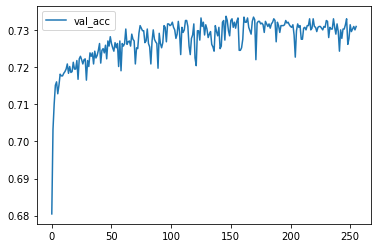

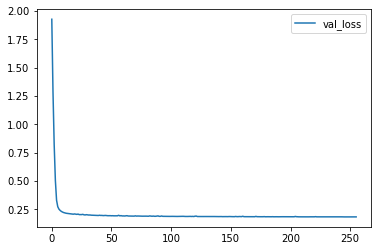

In [1546]:
import matplotlib.pyplot as plt

history = model.fit(
    train_data, train_labels, validation_split=0.55, epochs=256, batch_size=64, verbose=2
    #train_data, train_labels, validation_split=0.15, epochs=100, batch_size=128, verbose=2 #AK
)


# 輸出圖表
plt.plot(history.history["val_acc"], label="val_acc")
plt.legend()
plt.show()
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [1490]:
test_data=pd.read_csv("test.csv")
test_data=test_data.values

scaled_data = scaler.transform(test_data)

predicted_temperatures = model.predict(test_data)

print(predicted_temperatures)

[[0.9374454 0.       ]]
